# Lab 1: Introduction


##### __1. Briefly summarize how to set up a python programming environment on your local computer.__





#### For setting up the python environment on my computer, I carrried out the following steps:

* Install WSL 2/Ugrade from WSL 1: https://www.omgubuntu.co.uk/how-to-install-wsl2-on-windows-10
* Install VS Code on Windows + Python extension from marketplace for running .ipynb files: https://code.visualstudio.com/
* Install Ubuntu 20.4 on WSL 2: https://www.omgubuntu.co.uk/how-to-install-wsl2-on-windows-10
* Install miniconda on Ubuntu 20.04: https://docs.conda.io/projects/conda/en/latest/user-guide/install/linux.html
* Create a virtual environment: https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
* Install numpy, pandas, matplotlib in the virtual environment: https://fluiddyn.readthedocs.io/en/latest/get_good_Python_env.html
<br><br>__Optional Setup for Pytorch on Windows WSL:__
* Install the NVIDIA Windows Driver: https://medium.com/swlh/how-to-install-the-nvidia-cuda-toolkit-11-in-wsl2-88292cf4ab77
* Install CUDA, cuDNN:https://medium.com/nerd-for-tech/installing-pytorch-with-gpu-support-cuda-in-ubuntu-18-04-complete-guide-edd6d51ee7ab
* Install PyTorch: https://medium.com/nerd-for-tech/installing-pytorch-with-gpu-support-cuda-in-ubuntu-18-04-complete-guide-edd6d51ee7ab

The setup is now complete and deep learning models can now be run on the system.


# Lab Assignment: Implement Neural Network for XOR gate from scratch 


##### __2. Implement the training code for XOR network from scratch with Numpy, please plot the output of your trained network when given the input variables of the XOR truth table.__

In [1]:
# XOR table
import numpy as np
import pandas as pd

XOR_table_pd = pd.read_csv('XOR_table.csv')
XOR_table_pd

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


![](https://drive.google.com/uc?export=view&id=1lf82hKZxfBqhV2m5cLIRO_9pO1S3T4ty)

In [2]:
XOR_table = XOR_table_pd.values
X = XOR_table[:, :2]
targets = XOR_table[:, -1].reshape(-1,1)

print(X.shape)       # Input data
print(targets.shape) # Output targets

(4, 2)
(4, 1)


In [3]:
# Define dimensions on input, hidden and output layers
input_dim, hidden_dim, output_dim = 2, 20, 1

# Define learning rate
learning_rate= .1

# Define a hidden layer
W1 = np.random.randn(input_dim, hidden_dim)
# Define an output layer
W2 = np.random.randn(hidden_dim, output_dim)

# Define biases
b1 = np.random.rand(1, hidden_dim)
b2 = np.random.randn(1, output_dim)
# Define sigmoid activation function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

loss_array = np.zeros((10000))
# sigmoid(X).shape
for i in range(10000):

  # Forward pass: compute predicted y
  z = sigmoid(np.dot(X, W1) + b1)
  y = sigmoid(np.dot(z, W2) + b2)
  # print(z.shape, y.shape, targets.shape, (z*y).shape)
  # Compute and print L2-norm loss
  J = (y-targets).T @ (y-targets)
# print((y-targets).T @ (y-targets) == np.sum(np.sum((y-targets)**2)))
 
  # Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
  grad_W2 = 2 * np.dot(z.T, (y - targets)*y*(1-y))
  grad_b2 = 2 * np.sum((y - targets)*y*(1-y), axis=0, keepdims=True)
  grad_W1 = 2 * np.dot(X.T, np.dot((y - targets)*y*(1-y), W2.T)*z*(1-z))
  grad_b1 = 2 * np.sum(np.dot((y - targets)*y*(1-y), W2.T)*z*(1-z), axis=0, keepdims=True)
# print(gradW2[:, 0],  2*sum((y - targets)*y*(1-y)*z).reshape(-1, 1)[:, 0])

  # Update weights
  W2 -= learning_rate * grad_W2
  b2 -= learning_rate * grad_b2
  W1 -= learning_rate * grad_W1
  b1 -= learning_rate * grad_b1
  # Save loss to an array
  loss_array[i] = J 


In [4]:
# Applying an activation function to the output function for it to be exactly 1 and 0
y[y>0.5] = 1
y[y<=0.5] = 0
y

array([[0.],
       [1.],
       [1.],
       [0.]])

##### Plot of Output

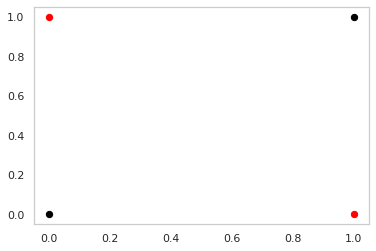

In [5]:
# Plot of output: Red symbolizes 1 and Black symbolizes 0 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : False})
s = X[(y == 1).repeat(2, axis=1)].reshape((-1, 2))
r = X[(y == 0).repeat(2, axis=1)].reshape((-1, 2))

plt.scatter(s[:, 0],s[:, 1], color = 'Red', s=40)
plt.scatter(r[:, 0],r[:, 1], color = 'Black', s=40)

##### __3. How does your loss function change over time during training? Plot your loss during training and describe it.__

The loss function first decreases rapidly to a value less than one in about 30 iterations. After that it decreases very slowly and approaches 0.1 over a thousand iterations.

0.889652114318997

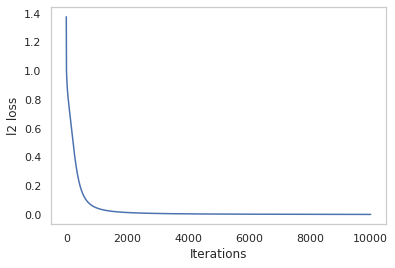

In [6]:
plt.xlabel("Iterations")
plt.ylabel("l2 loss")
plt.plot(loss_array)
loss_array[30]

##### __4. Define your own evaluation metrics, and report the performance of your network. You can split the training and validation data set from the XOR truth table, and report both the training and evaluation performance.__

In this question, I used 3 evaluation metrics check the performance of the neural network:

TP: True Positive, TN: True Negative, FN: False Negative, FP: False Positive
1. Accuracy = (TN + TP)/(TN+TP+FN+FP)
2. Recall = TP/ (TP + FN)
3. Precision = TP / (TP + FP)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score  

print("Accuracy score: ", accuracy_score(targets,  y))
print("Precision score: ", precision_score(targets, y, average="micro"))
print("Recall score: ", precision_score(targets, y, average="micro"))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0


##### __5. Plot and describe the decision boundary of the XOR network, try to explain it.__

The decision boundary seems to be approximating hyperbolic curve. The inner region symbolizes value 0 and outer region symbolizes value 1.

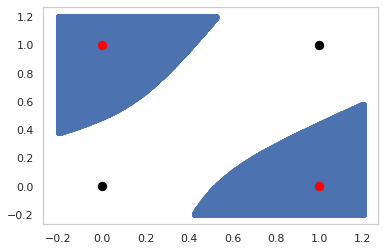

In [8]:
x1_points = np.linspace(-0.2, 1.2, num=1000)
x2_points = np.linspace(-0.2, 1.2, num=1000)
outputs = np.zeros((len(x1_points), len(x2_points)))
points = []

for i in range(len(x1_points)):
    for j in range(len(x2_points)):
        x = np.asarray([x1_points[i], x2_points[j]])
        
        z=sigmoid(np.dot(x,W1) + b1)
        y=sigmoid(np.dot(z,W2) + b2) 
        if y > 0.5:
            points.append(x)

        outputs[i, j] = y

outputs
points = np.array(points).copy()
plt.scatter(points[:, 0], points[:, 1])
plt.scatter([1,0],[0,1], color = 'Red', s = 70)
plt.scatter([0,1],[0,1], color = 'Black', s = 70)
